<a href="https://colab.research.google.com/github/Ignacio-Ibarra/NLP-Disasters/blob/master/VERSION%20FINAL/TP%202/Modelos/LSTM/Using%20Data%20Augmentation/LSTM_Data_Augmentation_synonym_replacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We're going to implement a data augmentation via random synonyms replacement of any word in each sentence. 

# Libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading CSV files

In [ ]:
x_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_train_cleaned.csv', 
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
x_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
id_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['id'])
y_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/y_train_cleaned.csv')

In [ ]:
len(x_train) 

6879

In [ ]:
x_train['text_cleaned'] = x_train['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['keyword_cleaned'] = x_train['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['location_cleaned'] = x_train['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

x_test['text_cleaned'] = x_test['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['keyword_cleaned'] = x_test['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['location_cleaned'] = x_test['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

# Data Augmentation

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import random

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We will get another sentence for every sentence we have. 

Uy funciona muuuy mal

## Using pre-trained vectors to obtain similarity

In [ ]:
import numpy as np

!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-08-02 23:26:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.6MB/s    in 97s     

2020-08-02 23:27:44 (16.2 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!pip install gensim
from gensim.models import KeyedVectors

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
wn_lemma = set(wn.all_lemma_names())
w2vocab = set(word2vec.vocab)
def get_synonyms2(word,number_syns): 
  output = []
  if word in w2vocab: 
    syn_list =  [syn for syn,similarity in word2vec.most_similar(word)]
    output_lenght = 0
    for i in range(len(syn_list)): 
      if syn_list[i] in wn_lemma:
        output.append(syn_list[i])
        output_lenght += 1
      if output_lenght >= number_syns:
        break
  return output


def synonym_replacement2(words,number_syns, number_replacements):
    
    
      words = words.split()
      
      new_words = words.copy()
      random_word_list = list(set([word for word in words if word not in stopwords.words('english')]))
      
      random.shuffle(random_word_list)
      
      num_replaced = 0
      
      for random_word in random_word_list:
          if num_replaced >= number_replacements:
            break
          
          if get_synonyms2(random_word, number_syns) != []:
                        
            synonym = random.choice(get_synonyms2(random_word, number_syns))
            synonym = re.sub('_',' ',synonym)
            synonym = re.sub('[@#!:?]','',synonym)
            new_words = [synonym.lower() if word == random_word else word for word in new_words]
            num_replaced += 1
            
      sentence = ' '.join(new_words)

      return sentence

In [ ]:
import re
x_train['fake_text'] = x_train['text_cleaned'].apply(lambda x: synonym_replacement2(x,4,2))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
text = x_train.text_cleaned.append(x_train.fake_text,ignore_index=True)

In [ ]:
targets = y_train.target.append(y_train.target,ignore_index=True)

In [ ]:
from google.colab import files

x_train.to_csv('xtrain_with_fake_txt.csv',index=False)
files.download('xtrain_with_fake_txt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Loading dataset if runtime disconect

In [ ]:
x_train = pd.read_csv('xtrain_with_fake_txt.csv')
x_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
id_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['id'])
y_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/y_train_cleaned.csv')



# Tokenizer

In [ ]:
pd.set_option('max_colwidth', 200)
(x_train['text_cleaned'] + (' ') + x_train['keyword_cleaned'] + (' ') + x_train['location_cleaned']).head()

0                                                                                            deeds reason earthquake may allah forgive us keyword location deed excuse earthquake may allah forgive us
1                                                                                                      forest fire near la range ask canada keyword location forest grassfire near le range ask canada
2    residents asked shelter place notified officers evacuation shelter place orders expected keyword location residents asked shelter place informed officers evacuation shelter place order expected
3                                                                 13000 people receive wildfire evacuation orders california keyword location 13000 people receive wildfire evacuation ordering nevada
4                                                                got sent photo ruby alaska smoke wildfire pours school keyword location got sent photo peridot alaska smoke wildfire pours elementary
dtype

## Instantiating the Tokenizer

In [ ]:
#Top word is the quantity of differents words that our word_index will have. 
top_word = 35000

In [ ]:
#Here we instantiate the tokenizer
tokenizer = Tokenizer(num_words=top_word)

#Here we make the fit we three features that are strings
tokenizer.fit_on_texts(text)

## Text to sequences of word_indexes

Converting the text into a sequence of integers, all of them are indexes of the tokenizer.word_index

In [ ]:
#Training set to sequence
x_train_txt = tokenizer.texts_to_sequences(text)

#Test set to sequence
x_test_txt = tokenizer.texts_to_sequences(x_test['text_cleaned'].astype('str'))

## Padding sequence

We add zeros into each sequence unitl complete a maximum of lenght

In [ ]:
#MAXLEN for text, location and keyword
max_words_txt = max([len(x) for x in x_train_txt]) + 1

print("top_word: ", str(top_word))
print("max_words_txt: ", str(max_words_txt))

top_word:  35000
max_words_txt:  25


In [ ]:
#Padding


x_train_txt = sequence.pad_sequences(x_train_txt, maxlen=max_words_txt)

x_test_txt = sequence.pad_sequences(x_test_txt, maxlen=max_words_txt)

print("X_train_txt.shape: ", x_train_txt.shape)


X_train_txt.shape:  (13758, 25)


# y_train to_categorical

In [ ]:
# One-hot category
from keras.utils import to_categorical
targets = to_categorical(targets)
print("y_train.shape: ", targets.shape)

y_train.shape:  (13758, 2)


## Loading word embedding file

---



In [ ]:
#Installing PyDrive
!pip install PyDrive

In [ ]:
#Importing modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticating and creating the PyDrive client (ACA TENES QUE ENTRAR AL LINK, ENTRAR CON TU CUENTA DE GMAIL, TE VA A DAR UN ID UNA VEZ QUE LE DES 'ALLOW' 
#Y LUEGO TENES QUE COPIAR EL ID EN EL CAMPO QUE TE VA A GENERAR EN ESTA CELDA)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Getting the file
downloaded2 = drive.CreateFile({'id':"1LA2yR5TRNPQu2btbbFVVHMqcHsj3yCuS"})   # replace the id with id of file you want to access
downloaded2.GetContentFile('glove.twitter.27B.200d.txt')                             # replace the filename of file you want to access   

In [ ]:
embeddings_dictionary = dict()
glove_file = open('glove.twitter.27B.200d.txt', encoding="utf8")

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [ ]:
embedding_dim = 200
embedding_matrix = zeros((top_word, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.layers import Bidirectional,  Reshape, Flatten, GRU
from keras.layers.merge import concatenate

## Model 1 - [text + fake_text] in Kaggle 0.79926

In [ ]:
# Defining the LSTM model 1

input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
dropout1 = Dropout(0.2)(embedding_layer1)
lstm1_1 = LSTM(128,return_sequences = True)(dropout1)
lstm1_2 = LSTM(128,return_sequences = True)(lstm1_1)
lstm1_2a = LSTM(128,return_sequences = True)(lstm1_2)
lstm1_3 = LSTM(128)(lstm1_2a)

# input2 = Input(shape=(max_words_key,))
# embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
# dropout2 = Dropout(0.2)(embedding_layer2)
# lstm2_1 = LSTM(64,return_sequences = True)(dropout2)
# lstm2_2 = LSTM(64,return_sequences = True)(lstm2_1)
# lstm2_3 = LSTM(64)(lstm2_2)

# input3 = Input(shape=(max_words_loc,))
# embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
# dropout3 = Dropout(0.2)(embedding_layer3)
# lstm3_1 = LSTM(32,return_sequences = True)(dropout3)
# lstm3_2 = LSTM(32,return_sequences = True)(lstm3_1)
# lstm3_3 = LSTM(32)(lstm3_2)

# merge = concatenate([lstm1_3, lstm2_3,lstm3_3])

dropout = Dropout(0.8)(lstm1_3)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model1 = Model(inputs=input1, outputs=output)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 25, 200)           7000000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 200)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25, 128)           168448    
_________________________________________________________________
lstm_6 (LSTM)                (None, 25, 128)           131584    
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 128)           131584    
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               1315

### Optimizer

In [ ]:
from keras.optimizers import Adam

optimizer1 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)
model1.compile(loss="binary_crossentropy", optimizer=optimizer1,
              metrics=["accuracy"])


### Training

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba  = model1.fit(x_train_txt, targets, validation_split=0.2, epochs=20, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Train on 11006 samples, validate on 2752 samples
Epoch 1/20
 - 96s - loss: 0.5532 - accuracy: 0.7242 - val_loss: 0.4921 - val_accuracy: 0.7703
Epoch 2/20
 - 90s - loss: 0.4787 - accuracy: 0.7831 - val_loss: 0.4787 - val_accuracy: 0.7823
Epoch 3/20
 - 90s - loss: 0.4619 - accuracy: 0.7948 - val_loss: 0.4563 - val_accuracy: 0.7947
Epoch 4/20
 - 89s - loss: 0.4437 - accuracy: 0.8029 - val_loss: 0.4528 - val_accuracy: 0.7998
Epoch 5/20
 - 89s - loss: 0.4317 - accuracy: 0.8074 - val_loss: 0.4394 - val_accuracy: 0.8041
Epoch 6/20
 - 89s - loss: 0.4150 - accuracy: 0.8193 - val_loss: 0.4260 - val_accuracy: 0.8136
Epoch 7/20
 - 91s - loss: 0.4016 - accuracy: 0.8250 - val_loss: 0.4196 - val_accuracy: 0.8194
Epoch 8/20
 - 89s - loss: 0.3894 - accuracy: 0.8305 - val_loss: 0.4117 - val_accuracy: 0.8212
Epoch 9/20
 - 90s - loss: 0.3772 - accuracy: 0.8403 - val_loss: 0.4068 - val_accuracy: 0.8270
Epoch 10/20
 - 89s - loss: 0.3555 - accuracy: 0.8492 - val_loss: 0.3927 - val_accuracy: 0.8318
Epoch 11/2

### Plotting results

In [ ]:
#Function to plot loss + accuracy in training and validation sets

def result_eva (loss,val_loss,acc,val_acc):
       
    epochs = range(1,len(loss)+1)
    plt.plot(epochs, loss,'b-o', label ='Training Loss')
    plt.plot(epochs, val_loss,'r-o', label ='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "b-o", label="Training Acc")
    plt.plot(epochs, val_acc, "r-o", label="Validation Acc")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

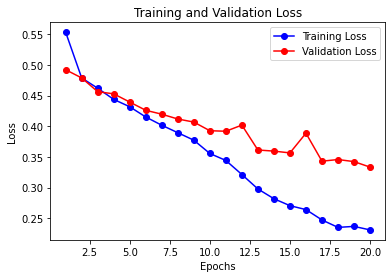

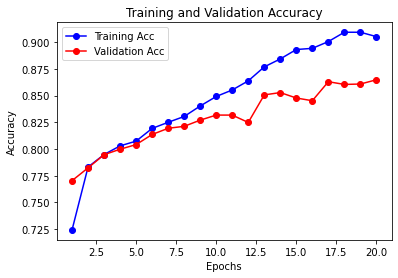

In [ ]:
result_eva(prueba.history['loss'], prueba.history['val_loss'], prueba.history['accuracy'], prueba.history['val_accuracy'])

### Predicting

In [ ]:
#Predicting test data

y_pred = model1.predict(x_test_txt, batch_size=16, verbose=2)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

### Creating df for make the submission

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred


In [ ]:
from google.colab import files
df.to_csv('26.submit.csv', index=False)
files.download('26.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 2 - LSTM+CNN over [location, text, keyword] - in Kaggle  0.80386



In [ ]:
input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
lstm1_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer1)
lstm1_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1)
lstm1_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1a)
res = Reshape((-1, x_train_txt.shape[1], 100))(lstm1_1b)
conv1 = Conv2D(100, (3,3), padding='same',activation="relu")(res)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

# input2 = Input(shape=(max_words_key,))
# embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
# lstm2_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer2)
# lstm2_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1)
# lstm2_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1a)
# res2 = Reshape((-1, x_train_key.shape[1], 100))(lstm2_1b)
# conv2 = Conv2D(100, (3,3), padding='same',activation="relu")(res2)
# pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
# flat2 = Flatten()(pool2)

# input3 = Input(shape=(max_words_loc,))
# embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
# lstm3_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer3)
# lstm3_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1)
# lstm3_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1a)
# res3 = Reshape((-1, x_train_loc.shape[1], 100))(lstm3_1b)
# conv3 = Conv2D(100, (3,3), padding='same',activation="relu")(res3)
# pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
# flat3 = Flatten()(pool3)

# merge = concatenate([flat1, flat2, flat3])

dropout = Dropout(0.4)(flat1)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model2 = Model(inputs=input1, outputs=output)
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 25)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 25, 200)           7000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25, 200)           240800    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 25, 200)           240800    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 25, 200)           240800    
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 25, 100)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 25, 100)        9010

In [ ]:
optimizer2 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=optimizer2,
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba2 = model2.fit(x_train_txt, targets, validation_split=0.2, epochs=20, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Train on 11006 samples, validate on 2752 samples
Epoch 1/20
 - 122s - loss: 0.5021 - accuracy: 0.7679 - val_loss: 0.4692 - val_accuracy: 0.7809
Epoch 2/20
 - 121s - loss: 0.4519 - accuracy: 0.7973 - val_loss: 0.4537 - val_accuracy: 0.7914
Epoch 3/20
 - 122s - loss: 0.4412 - accuracy: 0.8023 - val_loss: 0.4511 - val_accuracy: 0.7947
Epoch 4/20
 - 121s - loss: 0.4288 - accuracy: 0.8093 - val_loss: 0.4362 - val_accuracy: 0.7958
Epoch 5/20
 - 122s - loss: 0.4178 - accuracy: 0.8146 - val_loss: 0.4427 - val_accuracy: 0.7991
Epoch 6/20
 - 120s - loss: 0.4069 - accuracy: 0.8211 - val_loss: 0.4197 - val_accuracy: 0.8092
Epoch 7/20
 - 119s - loss: 0.3939 - accuracy: 0.8251 - val_loss: 0.4070 - val_accuracy: 0.8176
Epoch 8/20
 - 121s - loss: 0.3828 - accuracy: 0.8355 - val_loss: 0.3961 - val_accuracy: 0.8234
Epoch 9/20
 - 120s - loss: 0.3685 - accuracy: 0.8381 - val_loss: 0.3967 - val_accuracy: 0.8259
Epoch 10/20
 - 122s - loss: 0.3546 - accuracy: 0.8455 - val_loss: 0.3813 - val_accuracy: 0.8314


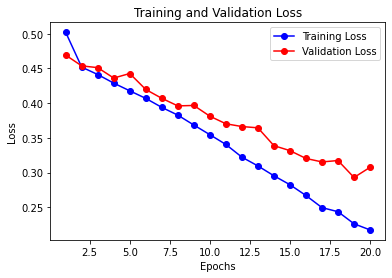

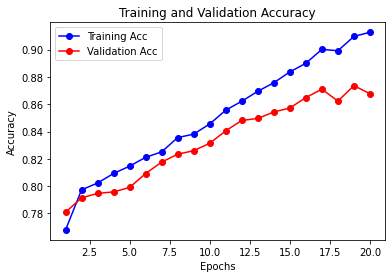

In [ ]:
result_eva(prueba2.history['loss'], prueba2.history['val_loss'], prueba2.history['accuracy'], prueba2.history['val_accuracy'])

In [ ]:
#Predicting test data

y_pred = model2.predict(x_test_txt, batch_size=16, verbose=2)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred
df.to_csv('27.submit.csv', index=False)

In [ ]:
from google.colab import files
files.download('27.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>